In [75]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [77]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [78]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [79]:
data1=data.drop(['lat','lon','ID'],axis=1)
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [80]:
data1=pd.get_dummies(data1)

In [81]:
data1.shape

(1538, 8)

In [82]:
data1

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [83]:
y=data1['price']

In [84]:
x = data1.drop('price',axis=1)

In [85]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [86]:
#!pip3 install scikit-learn 



In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [88]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
481,51,3197,120000,2,0,1,0
76,62,2101,103000,1,0,1,0
1502,51,670,32473,1,1,0,0
669,51,913,29000,1,1,0,0
1409,51,762,18800,1,1,0,0


In [89]:
x_train.shape

(1030, 7)

In [90]:
y_test.head()

481     7900
76      7900
1502    9400
669     8500
1409    9700
Name: price, dtype: int64

In [91]:
y_train.shape

(1030,)

In [92]:
from sklearn.linear_model import LinearRegression 

In [93]:
reg=LinearRegression()

In [94]:
reg.fit(x_train,y_train)

LinearRegression()

In [95]:
ypred=reg.predict(x_test)

In [96]:
ypred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [97]:
from sklearn.metrics import r2_score

In [98]:
r2_score(y_test,ypred)

0.8415526986865394

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(ypred,y_test)

581887.727391353

In [101]:
n=581887.727391353 ** (1/2)
print(n)

762.8156575420782


In [102]:
!pip3 install scikit-learn

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [104]:
ridge_regressor.best_params_

{'alpha': 30}

In [105]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8421969385523054

In [107]:
Results=pd.DataFrame(columns=['price','predicted'])
Results['price']=y_test
Results['predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,price,predicted,ID
0,481,7900,5869.741155,0
1,76,7900,7149.563327,1
2,1502,9400,9862.785355,2
3,669,8500,9719.283532,3
4,1409,9700,10035.895686,4
5,1414,9900,9650.311090,5
6,1089,9900,9669.183317,6
7,1507,9950,10115.128380,7
8,970,10700,9900.241944,8
9,1198,8999,9347.080772,9


[]

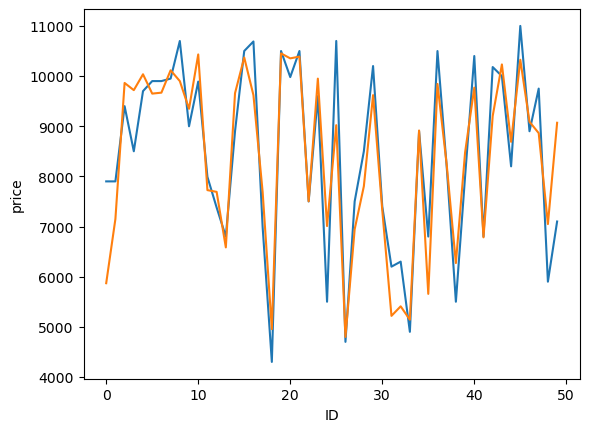

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=Results.head(50))
sns.lineplot(x='ID',y='predicted',data=Results.head(50))
plt.plot()